In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import os
import glob
import json
import torch
import pandas as pd

import matplotlib
from matplotlib.backends.backend_pgf import FigureCanvasPgf
from matplotlib import pyplot as plt
%matplotlib inline

import tsvar
tsvar.plotting.set_neurips_matplotib_rcparams()

In [3]:
output_df_1 = tsvar.plotting.load_outputs(exp_dir="../output/dimRegime-4/")
# Ignore MLE
cols_1 = [col for col in output_df_1.columns if not col.startswith('mle')]

Process file: ../output/dimRegime-4/1588946279-g04-d50-n350000/output-03.json...


In [4]:
# Load MLE experiment
output_df_2 = tsvar.plotting.load_outputs(exp_dir="../output/dimRegime-4-2/")
cols_2 = [col for col in output_df_2.columns if col.startswith('mle')]

Process file: ../output/dimRegime-4-2/1588946279-g04-d50-n350000/output-03.json...


In [5]:
def build_Id(row):
    return os.path.join(os.path.split(row['expId'])[1], row['outputIdx'])
output_df_1['Id'] = output_df_1.apply(build_Id, axis=1)
output_df_2['Id'] = output_df_2.apply(build_Id, axis=1)

output_df = pd.merge(output_df_1.loc[:, cols_1 + ['Id']], output_df_2.loc[:, cols_2 + ['Id']], on='Id')

print(output_df.shape)
output_df.head()

(198, 46)


,bbvi_loc,bbvi_log_scale,bbvi_coeffs_mean,bbvi_coeffs_mode,bbvi_adj_mean,bbvi_adj_mode,bbvi_conv,bbvi_history,vi_fixed_beta_as_po,vi_fixed_beta_ar_po,...,max_jumps,sim_seed_list,gen_seed,Id,mle_baseline,mle_beta,mle_adjacency,mle_conv,mle_history,mle_num_iter
0,"[-4.6081862449646, -3.4515676498413086, -5.373...","[-2.4246106147766113, -3.2138171195983887, -1....","[0.010009015854239156, 0.03172153425058259, 0....","[0.00989208119313279, 0.03164472155339636, 0.0...","[[0.12223798257486512, 3.664370942035484e-08, ...","[[0.12223798257486512, 3.664370942035484e-08, ...",False,"{'iter': [100, 200, 300, 400, 500, 600, 700, 8...","[[538.0259285038584, 1821.6457532308857, 339.0...","[[68651.203125, 68687.21875, 68675.0390625, 68...",...,35000,"[1719052374, 804465969, 844140983, 1647625613]",2141206194,1588946264-g00-d05-n035000/output-00.json,"[0.0071112965508138715, 0.04291056116869129, 0...","[[0.2582665556336602, 1.0919024842864022, 0.15...","[[0.13553637225657136, 1e-10, 0.15313722801560...",False,"{'iter': [100, 200, 300, 400, 500, 600, 700, 8...",20000
1,"[-4.492241382598877, -3.110403060913086, -5.23...","[-2.4891438484191895, -3.643054723739624, -1.9...","[0.011234133953136593, 0.04459825407669508, 0....","[0.01111869641700087, 0.04455245371654151, 0.0...","[[0.11861950107253648, 1.976834989426823e-11, ...","[[0.11861950107253648, 1.976834989426823e-11, ...",False,"{'iter': [100, 200, 300, 400, 500, 600, 700, 8...","[[554.122142457074, 2202.5290092649484, 325.52...","[[66846.4453125, 66854.21093702316, 66864.7187...",...,35000,"[1719052374, 804465969, 844140983, 1647625613]",2141206194,1588946264-g00-d05-n035000/output-01.json,"[0.007465997379041658, 0.024471518505226268, 0...","[[0.2967424087048948, 1.6907428365597745, 0.60...","[[0.13835212540675773, 1e-10, 0.18626046931901...",False,"{'iter': [100, 200, 300, 400, 500, 600, 700, 8...",20000
2,"[-4.272073745727539, -3.059673547744751, -7.02...","[-2.866898536682129, -3.4461894035339355, -0.7...","[0.01397540388087786, 0.04692682524971861, 0.0...","[0.013907757278139398, 0.046855398707922186, 0...","[[0.11785482886708026, 4.7322522537873845e-07,...","[[0.11785482886708026, 4.7322522537873845e-07,...",False,"{'iter': [100, 200, 300, 400, 500, 600, 700, 8...","[[807.4469527905256, 2525.8644238037873, 195.9...","[[67555.7734375, 67566.59375, 67539.7578125, 6...",...,35000,"[1719052374, 804465969, 844140983, 1647625613]",2141206194,1588946264-g00-d05-n035000/output-02.json,"[0.011025070298362501, 0.024144555164627924, 0...","[[0.46381367417011926, 130.96595924171893, 0.1...","[[0.1434755208879964, 0.4532851537346714, 0.15...",False,"{'iter': [100, 200, 300, 400, 500, 600, 700, 8...",20000
3,"[-5.528256893157959, -3.1480348110198975, -4.5...","[-1.6630340814590454, -3.63606858253479, -2.53...","[0.004044934846465457, 0.04295133716040261, 0....","[0.003832679899100904, 0.042906607801767895, 0...","[[0.17153424545300716, 2.6236074717810975e-08,...","[[0.17153424545300716, 2.6236074717810975e-08,...",False,"{'iter': [100, 200, 300, 400, 500, 600, 700, 8...","[[291.28801399876954, 2175.135755089826, 313.2...","[[68136.765625, 68129.2890625, 68083.4140625, ...",...,35000,"[1719052374, 804465969, 844140983, 1647625613]",2141206194,1588946264-g00-d05-n035000/output-03.json,"[0.0031379158660629694, 0.03497449405925006, 0...","[[1.1199668454052187, 18.899428053751997, 0.22...","[[0.17277513456163096, 0.07939342154671263, 0....",False,"{'iter': [100, 200, 300, 400, 500, 600, 700, 8...",20000
4,"[-3.467761754989624, -3.755539655685425, -7.14...","[-3.4198272228240967, -3.0862367153167725, -0....","[0.03120345296396557, 0.023412232875645374, 0....","[0.031153389476236474, 0.023339088044037566, 0...","[[0.05270114509598308, 0.23592564192207996, 1....","[[0.05270114509598308, 0.23592564192207996, 1....",False,"{'iter': [100, 200, 300, 400, 500, 600, 700, 8...","[[2432.0485051060277, 1914.89381711752, 25.650...","[[82870.7421875, 82876.09375, 82863.71875, 828...",...,35000,"[21673688, 1313350300

---

In [40]:
suf_col_dict = {
    'mle': 'mle_adjacency', 
    'bbvi_mean': 'bbvi_adj_mean', 
    'bbvi_mode': 'bbvi_adj_mode',
    'vi_mean': 'vi_adj_mean',
    'vi_mode': 'vi_adj_mode',
    'vi_fixed_beta_mean': 'vi_fixed_beta_adj_mean',
    'vi_fixed_beta_mode': 'vi_fixed_beta_adj_mode',
    'gb': 'gb_adj_normed',
}

plot_df = tsvar.plotting.make_plot_df(output_df, suf_col_dict, agg_col='dim', threshold=0.05)
plot_df

acc_mle                                     acc_bbvi_mean                                      ... fn_vi_fixed_beta_mode                               fn_gb                              
          min       max      mean       std count           min       max      mean       std count  ...                   min max      mean       std count   min  max    mean        std count
dim                                                                                                  ...                                                                                        
5    0.600000  1.000000  0.862000  0.094010    20      1.000000  1.000000  1.000000  0.000000    20  ...                     0   0  0.000000  0.000000    20     0    3    0.45   0.825578    20
10   0.760000  0.970000  0.912000  0.053764    20      0.980000  1.000000  0.998000  0.005231    20  ...                     0   1  0.050000  0.223607    20     2   12    7.90   2.403944    20
15   0.857778  0.964444  0.937778  0.028146    20      0.986667  1.000000  0.995556  0.004326    20  ...                     0   1  0.050000  0.223607    20    18   30   23.65   3.558163    20
20   0.887500  0.975000  0.948500  0.020686    20      0.977500  1.000000  0.993875  0.006255    20  ...                     0   4  0.200000  0.894427    20    20   53   37.30   8.651742    20
25   0.916800  0.988800  0.954080  0.018028    20      0.985600  0.998400  0.994080  0.003525    20  ...                     0   2  0.450000  0.604805    20    37   63   52.65   8.183906    20
30   0.908889  0.972222  0.946333  0.014701    20      0.976667  0.993333  0.986889  0.004198    20  ...                     0   4  1.550000  1.316894    20    66  102   86.75  10.371393    20
35   0.937143  0.970612  0.955184  0.009151    20      0.973878  0.991837  0.986000  0.004330    20  ...                     1   7  3.550000  2.038446    20    98  139  114.95  10.767764    20
40   0.935000  0.972500  0.958375  0.010818    20      0.978750  0.994375  0.985812  0.004598    20  ...                     2  10  5.550000  2.605157    20   125  168  143.55  14.195904    20
45   0.945185  0.969383  0.958444  0.006990    20      0.975309  0.992099  0.982988  0.003833    20  ...                     3  13  8.150000  3.048295    20   161  205  182.25  13.186416    20
50   0.946800  0.981600  0.961711  0.008896    18      0.974400  0.997200  0.985400  0.005127    18  ...                     2  20  9.833333  4.841609    18   183  249  205.50  20.762664    18

[10 rows x 320 columns]

In [41]:
def get_runtime(row, start_idx=0, unit='sec'):
    if unit == 'sec':
        factor = 1
    elif unit == 'min':
        factor = 1 / 60
    elif unit == 'hour':
        factor = 1 / 3600
    else:
        raise ValueError('Unknown unit')
    times = row['time'][start_idx:]
    if len(times) > 0:
        last_iter = row['iter'][-1]
        return np.mean(times) * last_iter * factor
    return np.nan

unit = 'min'

rt_df = pd.DataFrame(index=output_df.index)
rt_df['dim'] = output_df['dim']
rt_df['runtime_mle'] = output_df['mle_history'].apply(get_runtime, start_idx=0, unit=unit)
rt_df['runtime_bbvi_mean'] = output_df['bbvi_history'].apply(get_runtime, start_idx=0, unit=unit)
rt_df['runtime_vi_mean'] = output_df['vi_history'].apply(get_runtime, start_idx=10, unit=unit)
rt_df['runtime_vi_fixed_beta_mean'] = output_df['vi_fixed_beta_history'].apply(get_runtime, start_idx=10, unit=unit)
rt_df['runtime_gb'] = output_df['gb_history'].apply(get_runtime, start_idx=0, unit=unit)

rt_df = rt_df.groupby('dim', ).agg(['mean', 'std'])

plot_df = plot_df.join(rt_df)
plot_df

acc_mle                                     acc_bbvi_mean                                      ... runtime_mle             runtime_bbvi_mean            runtime_vi_mean            runtime_vi_fixed_beta_mean           runtime_gb          
          min       max      mean       std count           min       max      mean       std count  ...        mean         std              mean        std            mean        std                       mean       std       mean       std
dim                                                                                                  ...                                                                                                                                          
5    0.600000  1.000000  0.862000  0.094010    20      1.000000  1.000000  1.000000  0.000000    20  ...    5.563556    0.394682          5.827094   0.233462        0.248528   0.045618                   0.244832  0.081654   0.316298  0.022077
10   0.760000  0.970000  0.912000  0.053764    20      0.980000  1.000000  0.998000  0.005231    20  ...   17.010552    1.943884         16.376514   1.509116        1.786854   0.485954                   1.422635  0.132732   0.796389  0.110058
15   0.857778  0.964444  0.937778  0.028146    20      0.986667  1.000000  0.995556  0.004326    20  ...   36.261771    3.976382         37.409144   4.290301        5.649746   1.318515                   3.295879  0.469498   1.280743  0.178163
20   0.887500  0.975000  0.948500  0.020686    20      0.977500  1.000000  0.993875  0.006255    20  ...   57.670757    8.782201         57.935661   9.022177       11.391095   1.895551                   5.706022  0.706770   1.840960  0.264778
25   0.916800  0.988800  0.954080  0.018028    20      0.985600  0.998400  0.994080  0.003525    20  ...  101.782856   12.504403        102.801103  13.950606       21.982081   3.503408                   9.936455  1.340250   2.596719  0.361145
30   0.908889  0.972222  0.946333  0.014701    20      0.976667  0.993333  0.986889  0.004198    20  ...  156.725154   11.232290        165.146659  16.826937       34.469473   4.459393                  13.803396  1.861269   3.299816  0.482312
35   0.937143  0.970612  0.955184  0.009151    20      0.973878  0.991837  0.986000  0.004330    20  ...  219.780877   17.498335        223.856188  14.021200       46.815052   4.691539                  20.432868  2.385194   4.153656  0.504649
40   0.935000  0.972500  0.958375  0.010818    20      0.978750  0.994375  0.985812  0.004598    20  ...  276.229813   22.902862        272.250214  33.764885       51.421678   8.650402                  23.843461  4.105213   4.022103  0.788346
45   0.945185  0.969383  0.958444  0.006990    20      0.975309  0.992099  0.982988  0.003833    20  ...  314.211574   71.737647        303.535386  93.758054       47.495174  13.389576                  26.352711  3.715028   3.924812  0.743365
50   0.946800  0.981600  0.961711  0.008896    18      0.974400  0.997200  0.985400  0.005127    18  ...  289.219759  110.296545        250.477645  95.999389       45.663437  13.093902                  29.425065  5.999877   3.867732  0.829241

[10 rows x 330 columns]

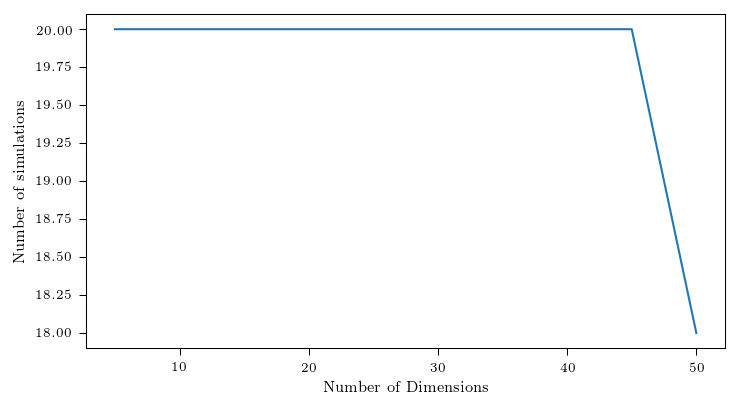

In [42]:
plt.figure()
plt.plot(plot_df.index, plot_df['acc_mle']['count'])
plt.ylabel('Number of simulations')
plt.xlabel('Number of Dimensions');

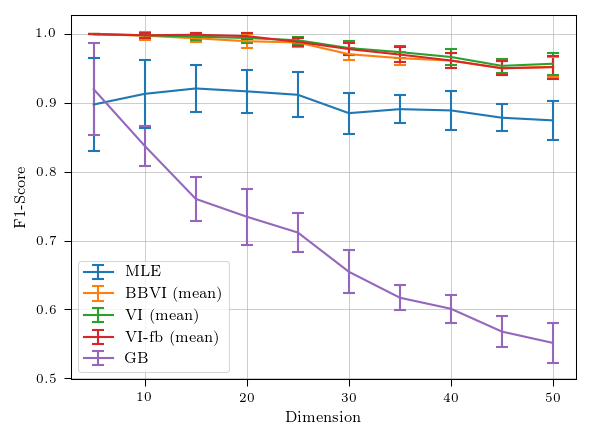

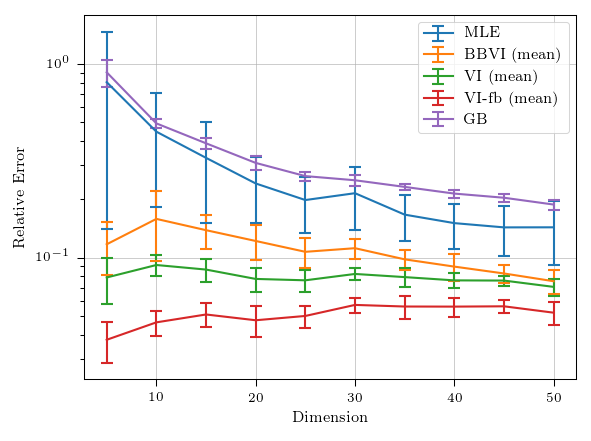

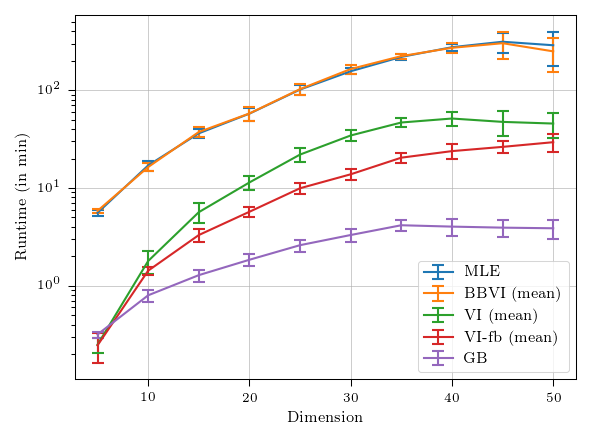

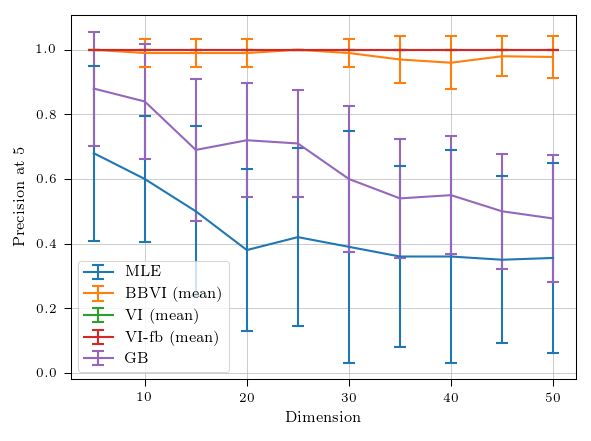

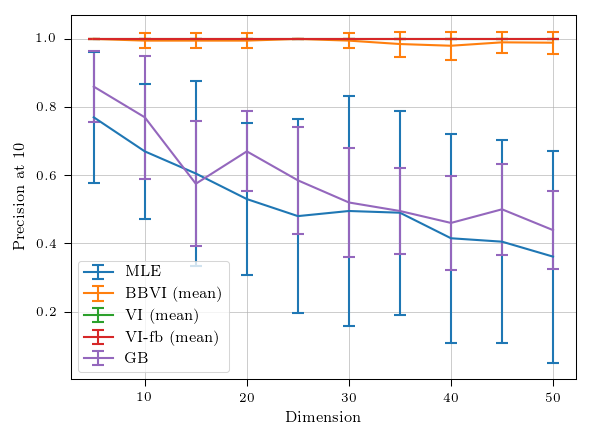

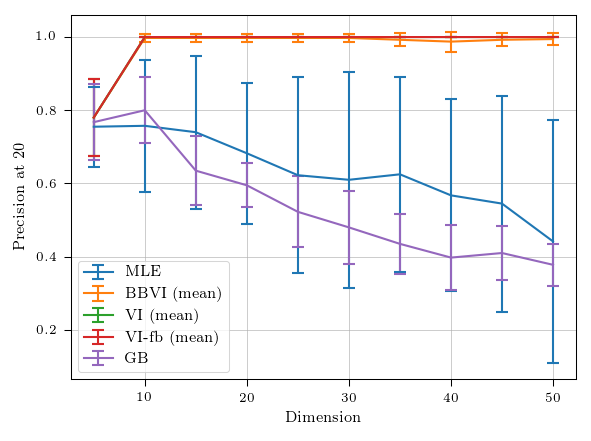

In [60]:
plot_meta_data = [
#    ('acc', 'Accuracy'),
    ('f1score', 'F1-Score'), 
    ('relerr', 'Relative Error'),
    ('runtime', f'Runtime (in {unit})'),
    ('precAt5', 'Precision at 5'),
    ('precAt10', 'Precision at 10'),
    ('precAt20', 'Precision at 20')
]

queries_list = [
    ('mle',                'MLE',          'C0', '-'), 
    ('bbvi_mean',          'BBVI (mean)',  'C1', '-'), 
    #('bbvi_mode',          'BBVI (mode)',  'C1', ':'),
    ('vi_mean',            'VI (mean)',    'C2', '-'),
    #('vi_mode',            'VI (mode)',    'C2', ':'),
    ('vi_fixed_beta_mean', 'VI-fb (mean)', 'C3', '-'),
    #('vi_fixed_beta_mode', 'VI-fb (mode)', 'C3', ':'),
    ('gb',                 'GB',           'C4', '-'),
]

for prefix, ylabel in plot_meta_data:

    plt.figure(figsize=(3.95, 2.95))
    plt.grid()
    for suf, label, color, ls in queries_list:
        col = '_'.join([prefix, suf])
        plt.errorbar(plot_df.index, plot_df[col]['mean'], yerr=plot_df[col]['std'], 
                     label=label, color=color, linestyle=ls)
    plt.legend()
    plt.xlabel('Dimension')
    #plt.xscale('log')
    plt.ylabel(ylabel);
    
    if prefix == 'relerr':
        plt.yscale('log')
        pass
        
    if prefix == 'runtime':
        plt.yscale('log')
        pass
    
    plt.tight_layout()
    plt.savefig(f'/Users/trouleau/Desktop/fig-{prefix}.pdf')

In [83]:
adj_true = output_df.iloc[0]['adjacency']
adj_hat = output_df.iloc[0]['vi_adj_mean']

print(output_df.iloc[0]['dim'])

from scipy.stats import kendalltau

# calculate kendall's correlation
coef, p = kendalltau(
    x=adj_hat.flatten(),
    y=adj_true.flatten()
)

print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

5
Kendall correlation coefficient: 0.799
Samples are correlated (reject H0) p=0.000


In [82]:
adj_true = output_df.iloc[197]['adjacency']
adj_hat = output_df.iloc[197]['gb_adjacency']

from scipy.stats import kendalltau

# calculate kendall's correlation
coef, p = kendalltau(
    x=adj_hat.flatten(),
    y=adj_true.flatten()
)

print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Kendall correlation coefficient: 0.374
Samples are correlated (reject H0) p=0.000
